# Hierarchical Clustering: Konsep Dasar

Hierarchical Clustering adalah metode clustering yang membentuk hierarki cluster dalam bentuk tree (dendrogram). Berbeda dengan K-Means, metode ini tidak memerlukan penentuan jumlah cluster di awal.

## Apa yang akan kita pelajari?
1. Pengertian Hierarchical Clustering
2. Jenis-jenis Hierarchical Clustering
3. Metode Penghitungan Jarak
4. Dendrogram dan Interpretasinya
5. Kelebihan dan Kekurangan
6. Perbandingan dengan K-Means
7. Visualisasi dan Contoh

Mari kita mulai dengan mempersiapkan library yang diperlukan!

In [41]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

# Set random seed untuk reproducibility
np.random.seed(42)

## 1. Pengertian Hierarchical Clustering

Hierarchical Clustering adalah metode clustering yang membangun hierarki cluster. Ada dua pendekatan utama:

### A. Agglomerative (Bottom-up):
1. Mulai dengan setiap data point sebagai cluster individual
2. Secara iteratif menggabungkan dua cluster terdekat
3. Proses berlanjut hingga semua data tergabung dalam satu cluster

### B. Divisive (Top-down):
1. Mulai dengan satu cluster besar berisi semua data
2. Secara iteratif memisahkan cluster menjadi cluster yang lebih kecil
3. Proses berlanjut hingga setiap data point menjadi cluster individual

## 2. Metode Penghitungan Jarak (Linkage Methods)

Ada beberapa metode untuk menghitung jarak antar cluster:

1. **Single Linkage**:
   - Jarak minimum antara dua data point dari dua cluster berbeda
   - Cenderung membentuk cluster memanjang

2. **Complete Linkage**:
   - Jarak maksimum antara dua data point dari dua cluster berbeda
   - Cenderung membentuk cluster bulat dan ukuran sama

3. **Average Linkage**:
   - Rata-rata jarak antara semua pasangan data point dari dua cluster
   - Kompromi antara single dan complete linkage

4. **Ward's Method**:
   - Meminimalkan total within-cluster variance
   - Cenderung membentuk cluster dengan ukuran seimbang

Mari kita visualisasikan perbedaan metode linkage ini dengan contoh sederhana!

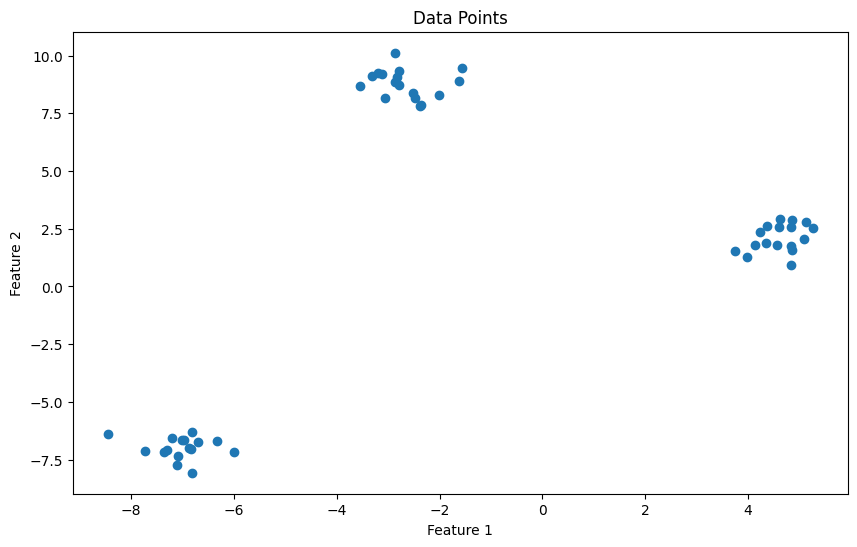

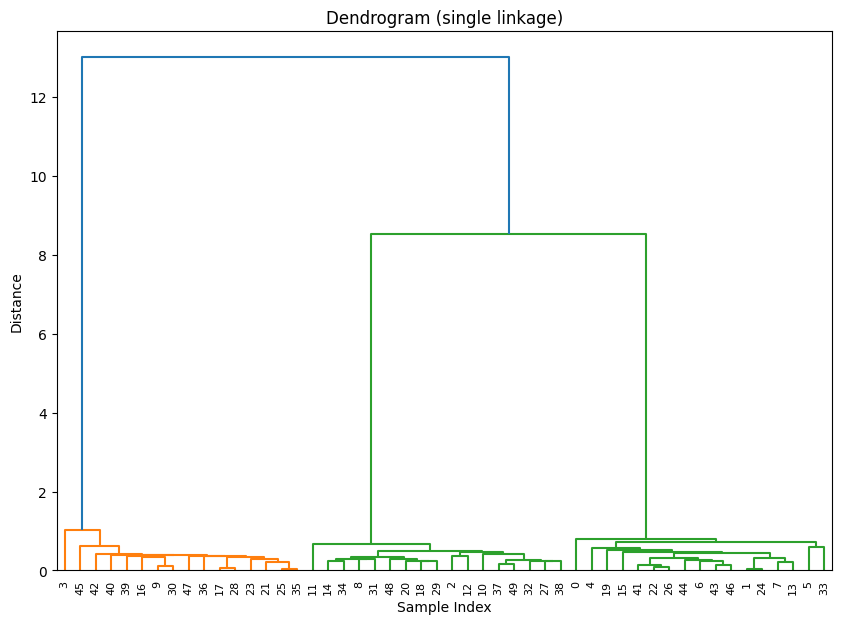

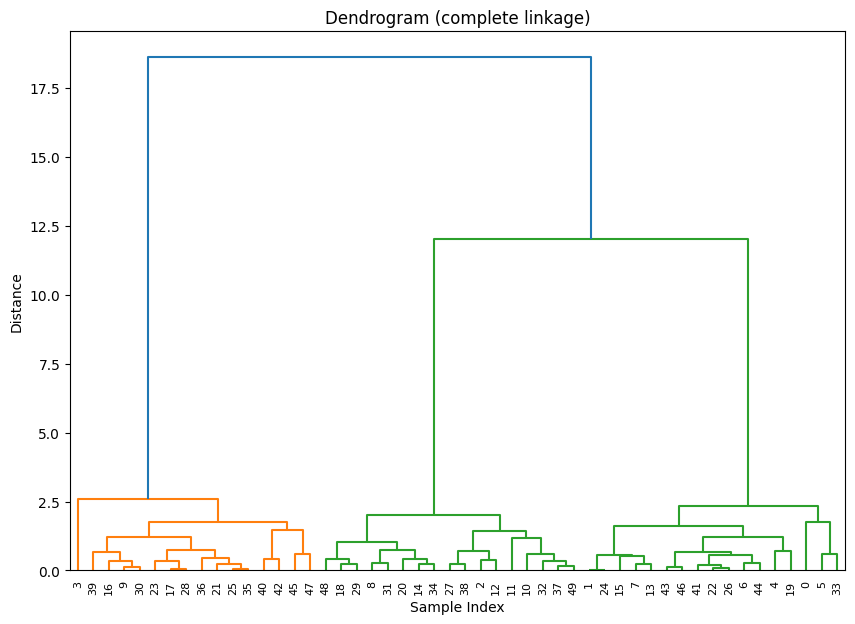

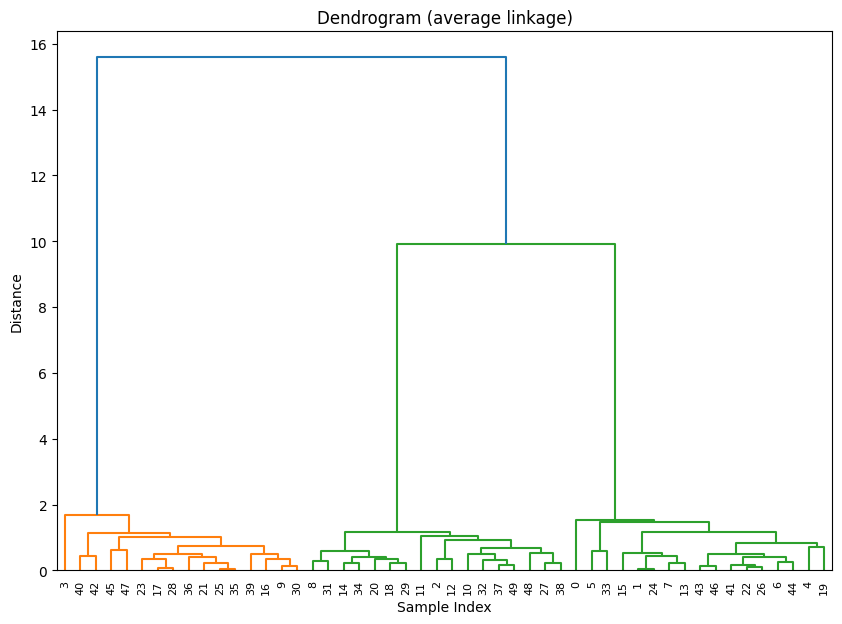

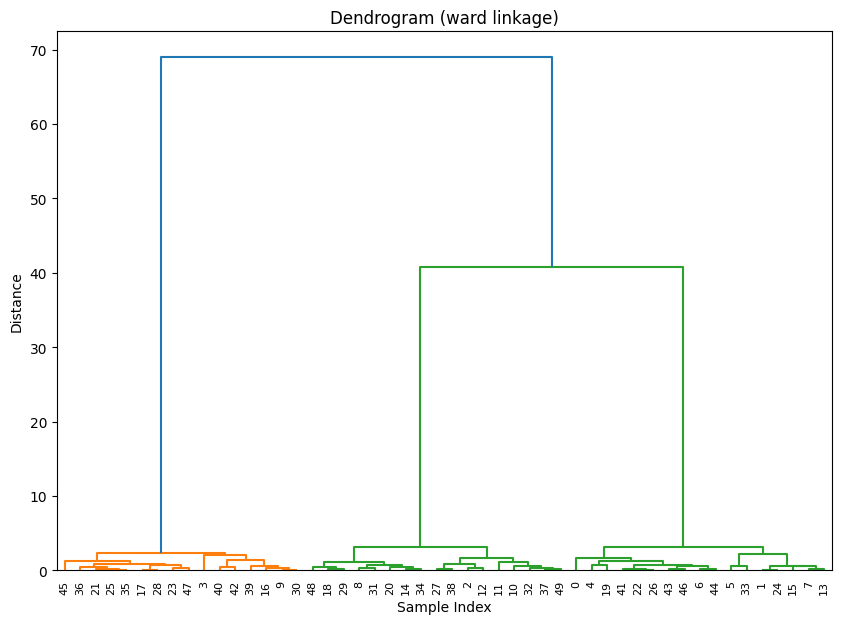

In [42]:
# Membuat data sintesis
X, y = make_blobs(n_samples=50, centers=3, cluster_std=0.60, random_state=42)

# Fungsi untuk membuat dendrogram
def plot_dendrogram(linkage_method):
    plt.figure(figsize=(10, 7))
    
    # Membuat linkage matrix
    linkage_matrix = linkage(X, method=linkage_method)
    
    # Plot dendrogram
    dendrogram(linkage_matrix)
    plt.title(f'Dendrogram ({linkage_method} linkage)')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

# Visualisasi data points
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.title('Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Plot dendrogram untuk berbagai metode linkage
methods = ['single', 'complete', 'average', 'ward']
for method in methods:
    plot_dendrogram(method)

## 3. Memahami Dendrogram

Dendrogram adalah visualisasi hierarki cluster dalam bentuk diagram pohon. Beberapa komponen penting dalam dendrogram:

1. **Sumbu X**: 
   - Menunjukkan indeks sampel data
   - Setiap leaf node merepresentasikan satu data point

2. **Sumbu Y**:
   - Menunjukkan jarak atau dissimilarity
   - Semakin tinggi garis horizontal, semakin besar jarak antar cluster

3. **Garis Vertikal**:
   - Menunjukkan cluster yang terbentuk
   - Panjangnya menunjukkan jarak antar cluster

4. **Garis Horizontal**:
   - Menghubungkan cluster
   - Ketinggiannya menunjukkan pada jarak berapa cluster digabung

### Cara Membaca Dendrogram:
1. Mulai dari bawah (leaf nodes)
2. Bergerak ke atas mengikuti garis vertikal
3. Perhatikan ketinggian garis horizontal untuk melihat jarak
4. Potong dendrogram secara horizontal untuk mendapatkan jumlah cluster

Mari kita lihat bagaimana cara menentukan jumlah cluster optimal menggunakan dendrogram!

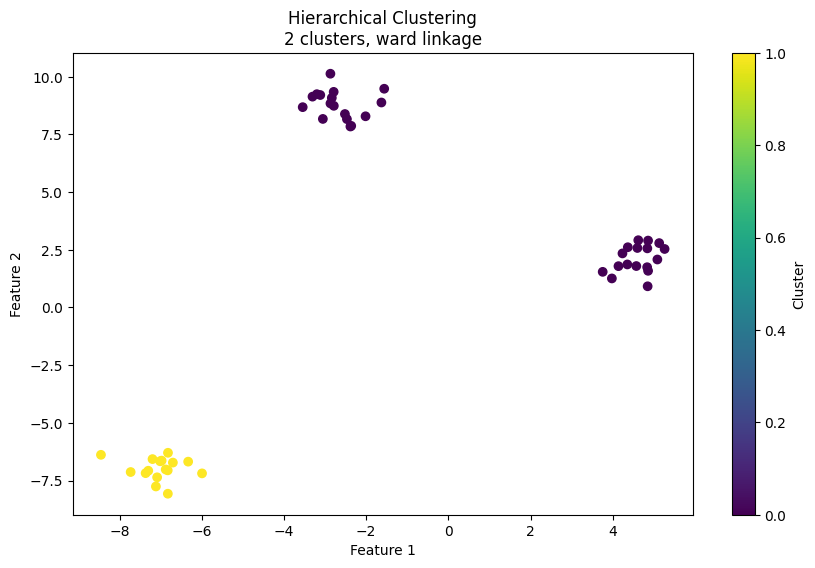


Informasi untuk 2 clusters:
Cluster 0: 34 sampel
Cluster 1: 16 sampel


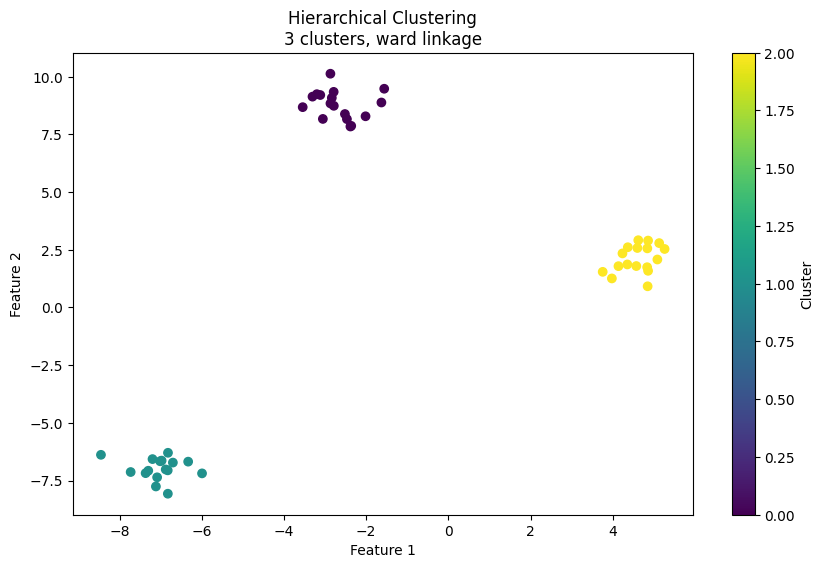


Informasi untuk 3 clusters:
Cluster 0: 17 sampel
Cluster 1: 16 sampel
Cluster 2: 17 sampel


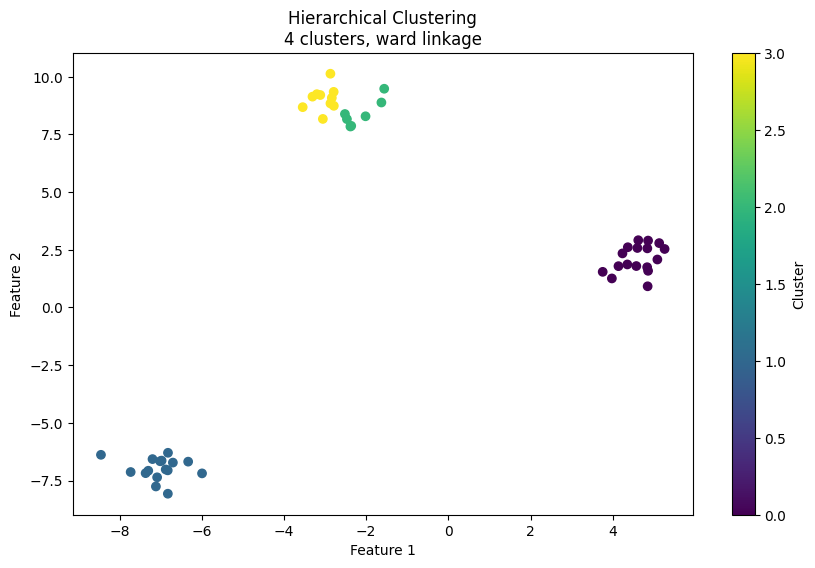


Informasi untuk 4 clusters:
Cluster 0: 17 sampel
Cluster 1: 16 sampel
Cluster 2: 7 sampel
Cluster 3: 10 sampel


In [43]:
# Fungsi untuk visualisasi hasil clustering
def plot_clusters(X, n_clusters, linkage_method='ward'):
    # Melakukan clustering
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
    clustering.fit(X)
    
    # Plot hasil
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, cmap='viridis')
    plt.title(f'Hierarchical Clustering\n{n_clusters} clusters, {linkage_method} linkage')
    plt.colorbar(scatter, label='Cluster')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
    
    return clustering.labels_

# Visualisasi dengan berbagai jumlah cluster
for n_clusters in [2, 3, 4]:
    labels = plot_clusters(X, n_clusters)
    
    # Print informasi cluster
    print(f"\nInformasi untuk {n_clusters} clusters:")
    for i in range(n_clusters):
        cluster_size = np.sum(labels == i)
        print(f"Cluster {i}: {cluster_size} sampel")

## 4. Perbandingan Hierarchical Clustering vs K-Means

### Hierarchical Clustering:

**Kelebihan:**
1. Tidak perlu menentukan jumlah cluster di awal
2. Memberikan hierarki cluster yang informatif
3. Dendrogram membantu visualisasi struktur data
4. Lebih fleksibel dalam bentuk cluster

**Kekurangan:**
1. Komputasi lebih berat (O(n³) untuk metode naive)
2. Membutuhkan memori lebih besar
3. Tidak praktis untuk dataset sangat besar
4. Sensitif terhadap noise dan outlier

### K-Means:

**Kelebihan:**
1. Komputasi lebih ringan (O(kni))
2. Mudah diimplementasikan
3. Bekerja baik untuk cluster berbentuk bola
4. Cocok untuk dataset besar

**Kekurangan:**
1. Perlu menentukan K di awal
2. Sensitif terhadap inisialisasi
3. Tidak memberikan hierarki cluster
4. Asumsi cluster berbentuk bola

## 5. Kapan Menggunakan Hierarchical Clustering?

### Gunakan Hierarchical Clustering ketika:
1. Ingin melihat struktur hierarki data
2. Dataset relatif kecil
3. Tidak yakin dengan jumlah cluster
4. Bentuk cluster tidak harus spherical

### Gunakan K-Means ketika:
1. Dataset besar
2. Sudah tahu jumlah cluster yang diinginkan
3. Performa komputasi penting
4. Cluster cenderung berbentuk bola

## 6. Tips Penggunaan Hierarchical Clustering:

1. **Preprocessing Data:**
   - Standardisasi fitur
   - Tangani missing values
   - Identifikasi dan tangani outlier

2. **Pemilihan Metode Linkage:**
   - Single: untuk cluster memanjang
   - Complete: untuk cluster bulat
   - Average: untuk pendekatan seimbang
   - Ward: untuk cluster ukuran seimbang

3. **Penentuan Jumlah Cluster:**
   - Gunakan dendrogram
   - Pertimbangkan domain knowledge
   - Validasi dengan metrik cluster

4. **Validasi Hasil:**
   - Silhouette score
   - Calinski-Harabasz index
   - Davies-Bouldin index

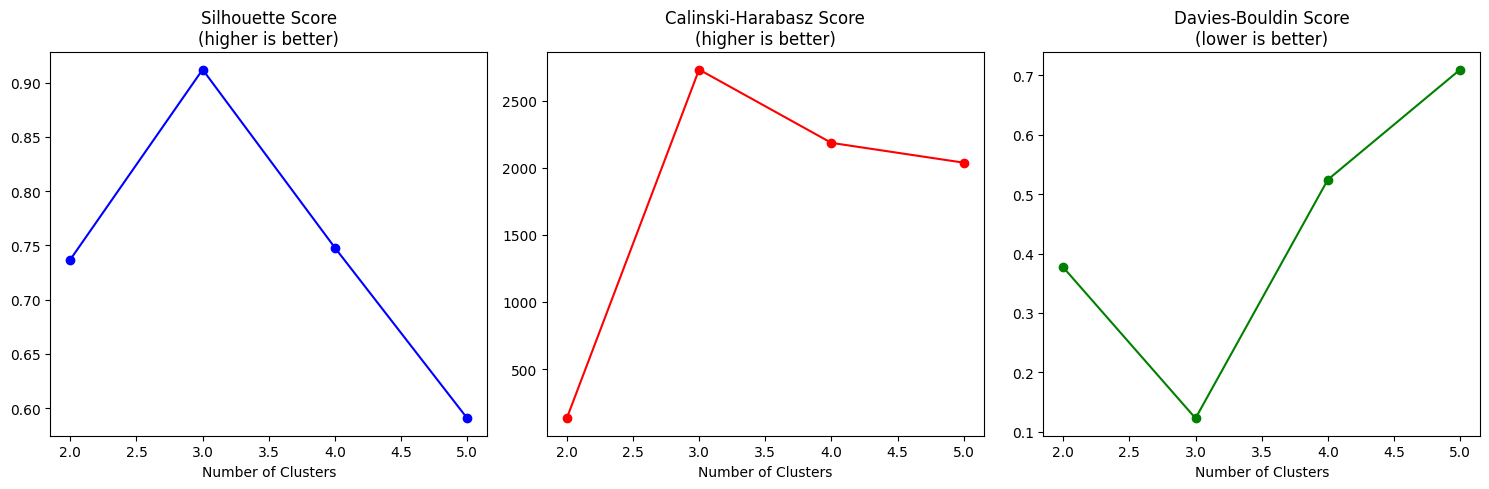


Optimal number of clusters:
Silhouette Score: 3
Calinski-Harabasz Score: 3
Davies-Bouldin Score: 3


In [44]:
# Import metrik validasi
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Evaluasi berbagai jumlah cluster
n_clusters_range = range(2, 6)
scores = {
    'silhouette': [],
    'calinski_harabasz': [],
    'davies_bouldin': []
}

for n_clusters in n_clusters_range:
    # Fit clustering
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    labels = clustering.fit_predict(X)
    
    # Hitung scores
    scores['silhouette'].append(silhouette_score(X, labels))
    scores['calinski_harabasz'].append(calinski_harabasz_score(X, labels))
    scores['davies_bouldin'].append(davies_bouldin_score(X, labels))

# Visualisasi scores
plt.figure(figsize=(15, 5))

# Plot Silhouette Score
plt.subplot(131)
plt.plot(list(n_clusters_range), scores['silhouette'], 'bo-')
plt.title('Silhouette Score\n(higher is better)')
plt.xlabel('Number of Clusters')

# Plot Calinski-Harabasz Score
plt.subplot(132)
plt.plot(list(n_clusters_range), scores['calinski_harabasz'], 'ro-')
plt.title('Calinski-Harabasz Score\n(higher is better)')
plt.xlabel('Number of Clusters')

# Plot Davies-Bouldin Score
plt.subplot(133)
plt.plot(list(n_clusters_range), scores['davies_bouldin'], 'go-')
plt.title('Davies-Bouldin Score\n(lower is better)')
plt.xlabel('Number of Clusters')

plt.tight_layout()
plt.show()

# Print optimal number of clusters based on each metric
print("\nOptimal number of clusters:")
print(f"Silhouette Score: {n_clusters_range[np.argmax(scores['silhouette'])]}")
print(f"Calinski-Harabasz Score: {n_clusters_range[np.argmax(scores['calinski_harabasz'])]}")
print(f"Davies-Bouldin Score: {n_clusters_range[np.argmin(scores['davies_bouldin'])]}")

## 7. Latihan

1. **Eksperimen dengan Data:**
   - Buat dataset dengan berbagai bentuk cluster
   - Uji dengan berbagai metode linkage
   - Bandingkan hasil clustering

2. **Analisis Dendrogram:**
   - Interpretasi struktur hierarki
   - Tentukan cut-off point optimal
   - Identifikasi sub-cluster

3. **Validasi Cluster:**
   - Hitung metrik validasi internal
   - Bandingkan dengan K-Means
   - Evaluasi stabilitas cluster

4. **Aplikasi Praktis:**
   - Customer segmentation
   - Document clustering
   - Image segmentation

## 8. Kesimpulan

Hierarchical Clustering adalah metode powerful untuk:
1. Memahami struktur hierarki data
2. Menemukan cluster tanpa asumsi jumlah cluster
3. Visualisasi hubungan antar data point

Poin Penting:
1. Pilih metode linkage sesuai karakteristik data
2. Gunakan dendrogram untuk analisis struktur
3. Validasi hasil dengan berbagai metrik
4. Pertimbangkan trade-off antara kompleksitas dan hasil

## 9. Referensi

1. Scikit-learn Documentation:
   - https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

2. Understanding Hierarchical Clustering:
   - https://en.wikipedia.org/wiki/Hierarchical_clustering

3. Clustering Metrics:
   - https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

4. Visualization Techniques:
   - https://seaborn.pydata.org/generated/seaborn.clustermap.html